In [1]:
import platform
import os

import numpy as np

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_efficiency_1d

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 7  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'ip1_test_2-27-25'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run_1'

det_single = 'inter_plein_1'

# file_nums = list(range(10, 20))
file_nums = 'all'

noise_threshold_sigmas = 6

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position
z_rot_range = [-5, 5]

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 57/57 [00:02<00:00, 28.15it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
det.center[2] = 712
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

# det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=True)
det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=False)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_2': 460}
Detector center: [ 15.3   66.15 712.  ]
Detector active size: [127.125 127.      4.   ]
Reading in data...


100%|██████████| 57/57 [00:23<00:00,  2.38it/s]


Read in data shape: (79117, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00, 12.94it/s]


Fitting time: 1.3743689060211182 s
Processed chunk 1/1
Getting hits...
Hits shape: (79117, 256)


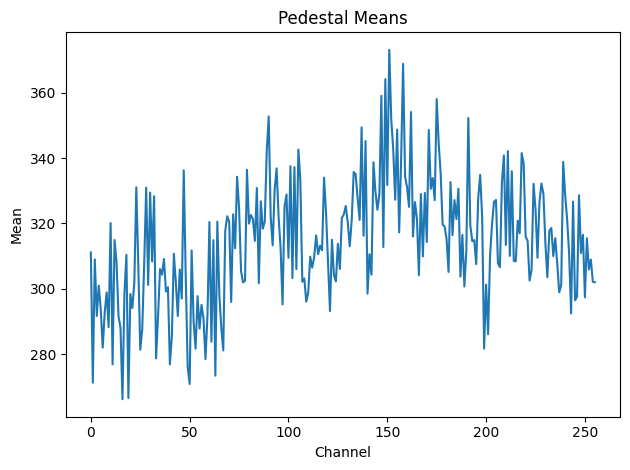

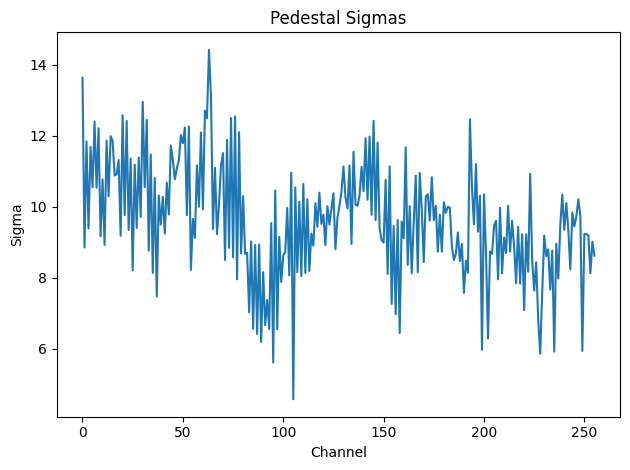

In [6]:
det.dream_data.plot_pedestals()

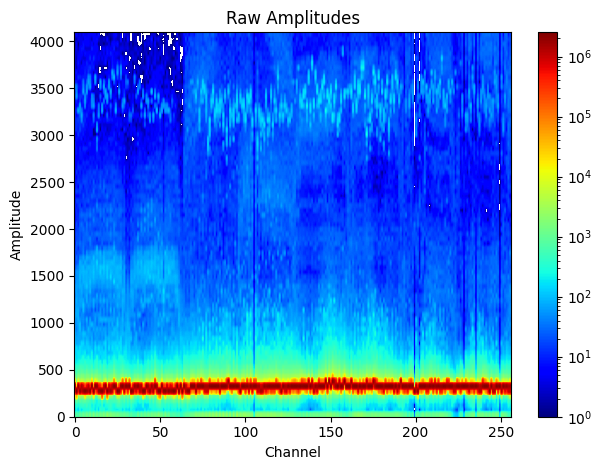

In [7]:
det.dream_data.plot_raw_amps_2d_hist()

In [8]:
# for event_num in range(min(len(det.dream_data.hits), 20)):
    # det.plot_event_1d(event_num)
    # det.plot_event_2d(event_num)
    # det.dream_data.plot_waveforms(event_num)

In [9]:
# det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: []
Connector 2 Dead Strips: []
Connector 3 Dead Strips: []
Connector 4 Dead Strips: []


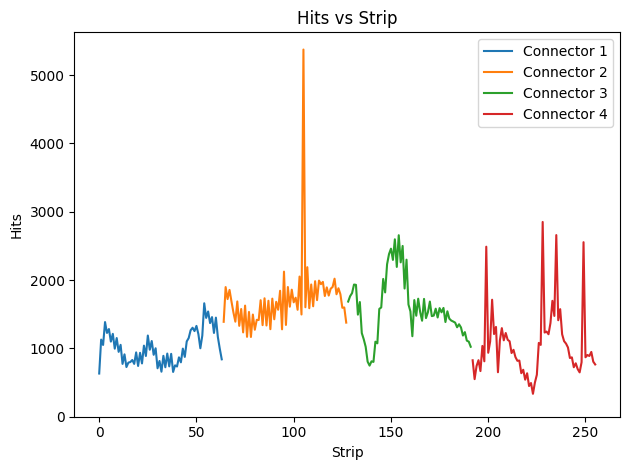

In [10]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

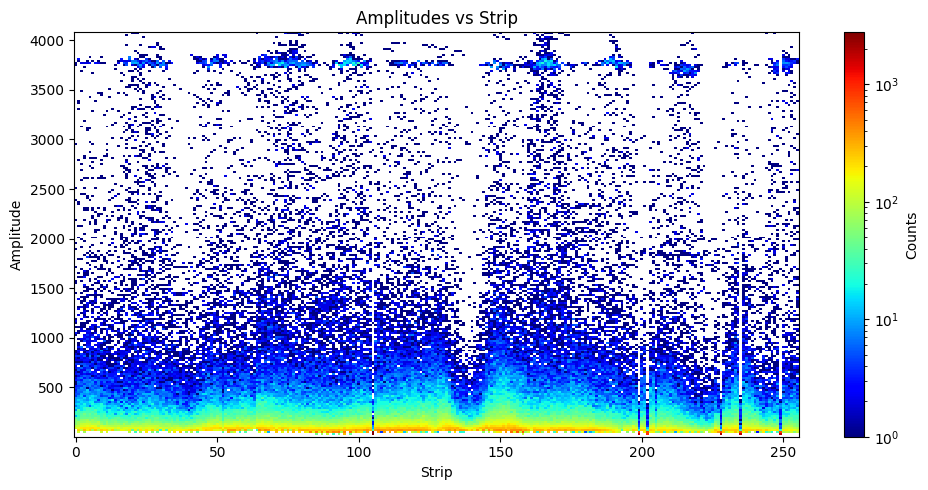

In [11]:
det.dream_data.plot_amplitudes_vs_strip()

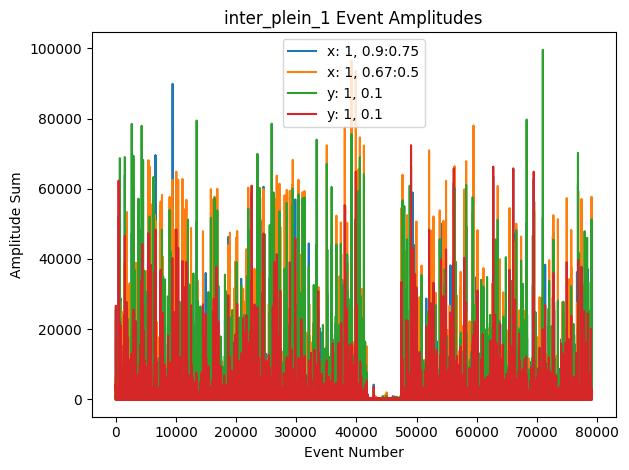

In [12]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

Detector center: [ 15.3   66.15 712.  ]
Detector rotations: []


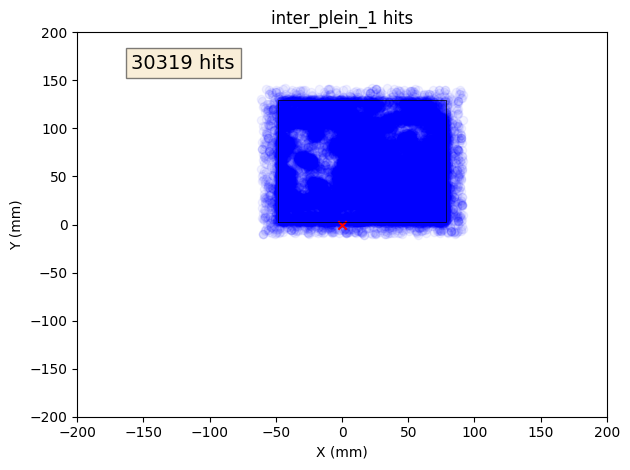

In [13]:
plot_ray_hits_2d(det, ray_data)
print(f'Detector center: {det.center}')
print(f'Detector rotations: {det.rotations}')

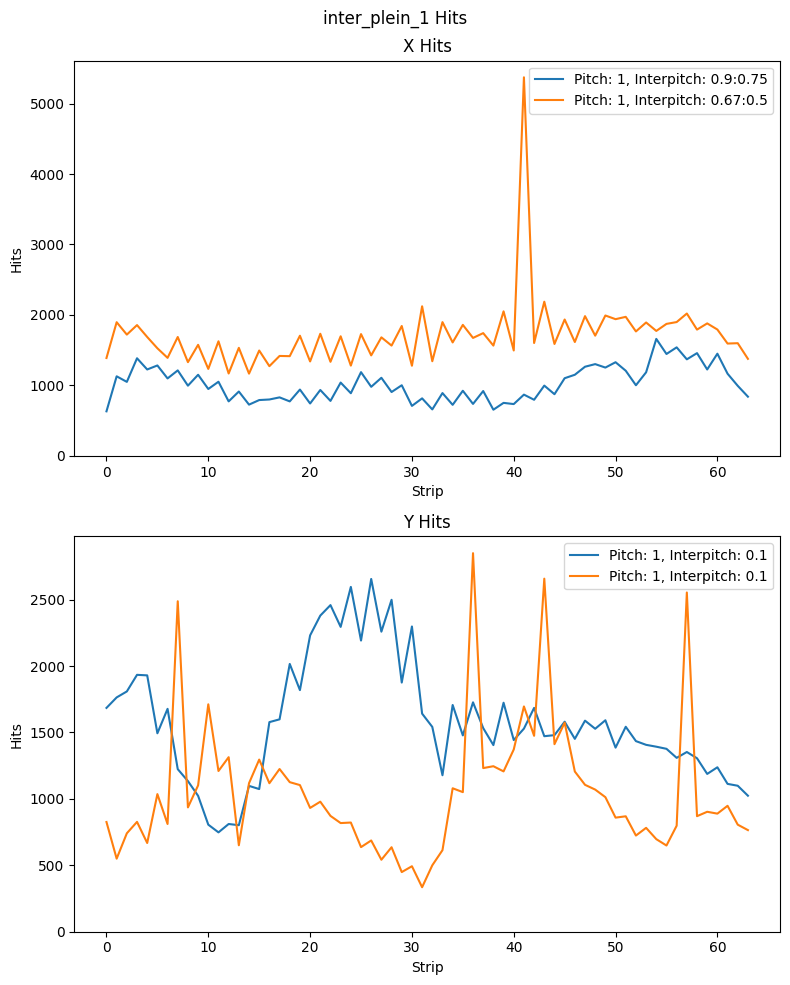

In [14]:
det.plot_hits_1d()

In [15]:
print(len(det.dream_data.hits))

79117


In [16]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

z: 707.0
z: 707.3448275862069
z: 707.6896551724138
z: 708.0344827586207
z: 708.3793103448276
z: 708.7241379310345
z: 709.0689655172414
z: 709.4137931034483
z: 709.7586206896551
z: 710.1034482758621
z: 710.448275862069
z: 710.7931034482758
z: 711.1379310344828
z: 711.4827586206897
z: 711.8275862068965
z: 712.1724137931035
z: 712.5172413793103
z: 712.8620689655172
z: 713.2068965517242
z: 713.551724137931
z: 713.8965517241379
z: 714.2413793103449
z: 714.5862068965517
z: 714.9310344827586
z: 715.2758620689655
z: 715.6206896551724
z: 715.9655172413793
z: 716.3103448275862
z: 716.6551724137931
z: 717.0
z_rot: -5.0
z_rot: -4.655172413793103
z_rot: -4.310344827586206
z_rot: -3.9655172413793105
z_rot: -3.6206896551724137
z_rot: -3.275862068965517
z_rot: -2.9310344827586206
z_rot: -2.586206896551724
z_rot: -2.2413793103448274
z_rot: -1.8965517241379306
z_rot: -1.5517241379310343
z_rot: -1.206896551724138
z_rot: -0.8620689655172411
z_rot: -0.5172413793103443
z_rot: -0.1724137931034484
z_rot: 0.17

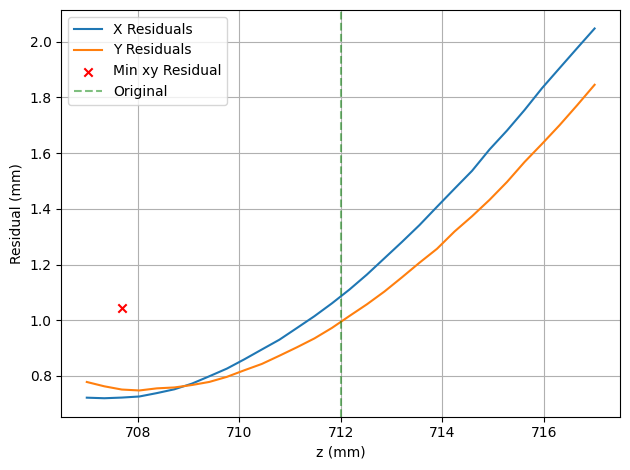

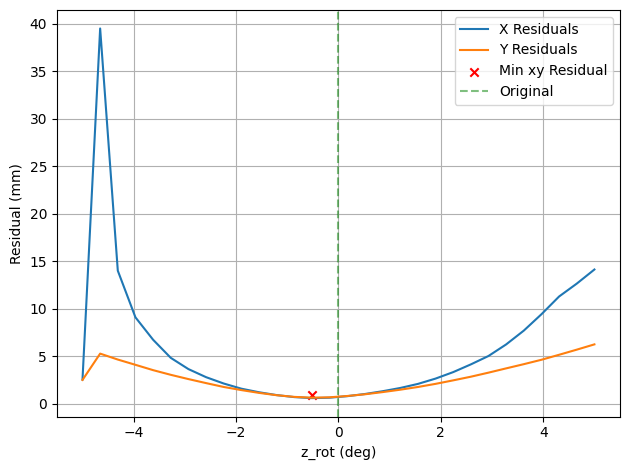

In [17]:
# z_orig = det.center[2]
# x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
# y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
# ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    # det.add_rotation(-90, 'z')
    align_dream(det, ray_data, z_align_range, z_rot_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

z: 702.6896551724138
z: 703.0344827586207
z: 703.3793103448277
z: 703.7241379310345
z: 704.0689655172414
z: 704.4137931034484
z: 704.7586206896552
z: 705.1034482758621
z: 705.448275862069
z: 705.7931034482759
z: 706.1379310344828
z: 706.4827586206897
z: 706.8275862068966
z: 707.1724137931035
z: 707.5172413793103
z: 707.8620689655173
z: 708.2068965517242
z: 708.551724137931
z: 708.896551724138
z: 709.2413793103449
z: 709.5862068965517
z: 709.9310344827587
z: 710.2758620689656
z: 710.6206896551724
z: 710.9655172413793
z: 711.3103448275863
z: 711.6551724137931
z: 712.0
z: 712.344827586207
z: 712.6896551724138
z_rot: -5.0
z_rot: -4.655172413793103
z_rot: -4.310344827586206
z_rot: -3.9655172413793105
z_rot: -3.6206896551724137
z_rot: -3.275862068965517
z_rot: -2.9310344827586206
z_rot: -2.586206896551724
z_rot: -2.2413793103448274
z_rot: -1.8965517241379306
z_rot: -1.5517241379310343
z_rot: -1.206896551724138
z_rot: -0.8620689655172411
z_rot: -0.5172413793103443
z_rot: -0.1724137931034484
z

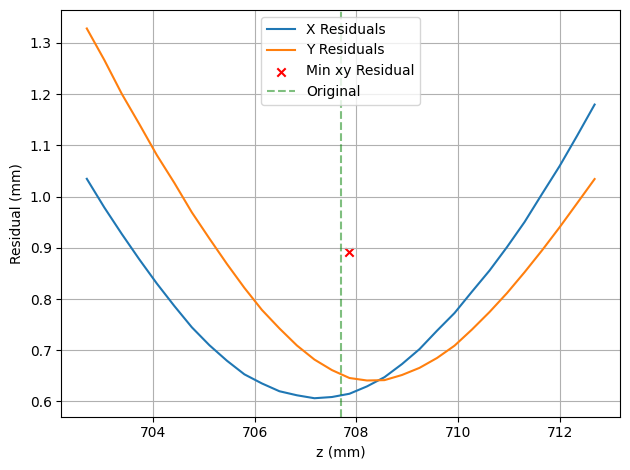

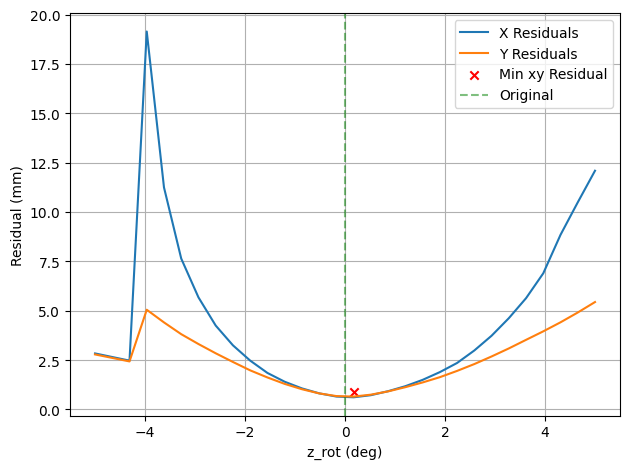

In [18]:
if realign_dream:
    # det.add_rotation(-90, 'z')
    align_dream(det, ray_data, z_align_range, z_rot_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

Detector center: [ 15.33247505  66.13789212 707.86206897]
Detector rotations: [[-0.5172413793103443, 0, 0], [0.1724137931034484, 0, 0]]


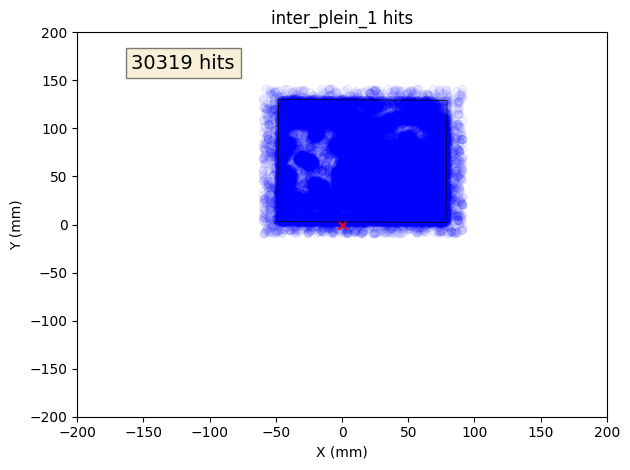

In [19]:
plot_ray_hits_2d(det, ray_data)
print(f'Detector center: {det.center}')
print(f'Detector rotations: {det.rotations}')

Pre-filtered rays: 411094
All rays: 84166


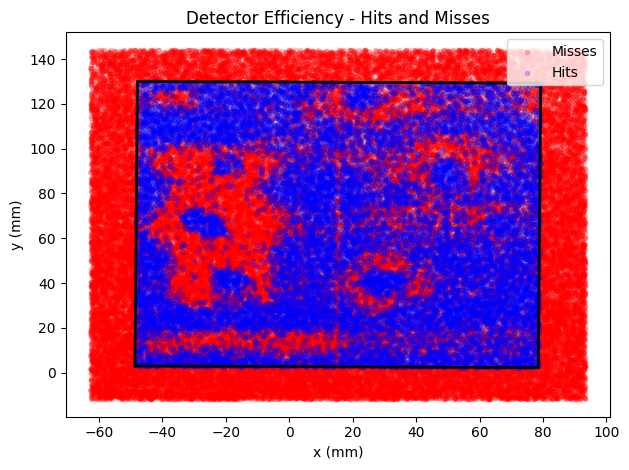

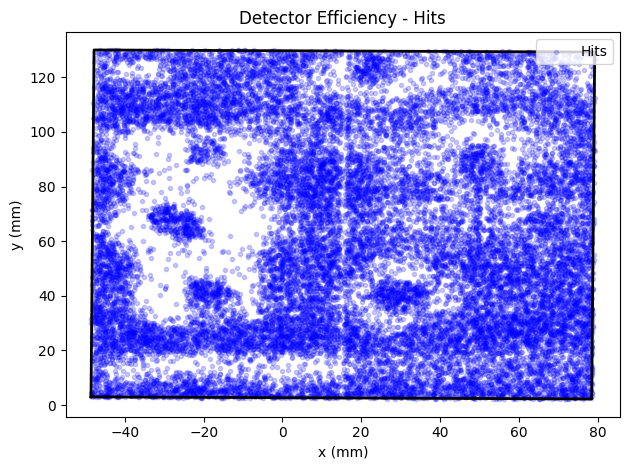

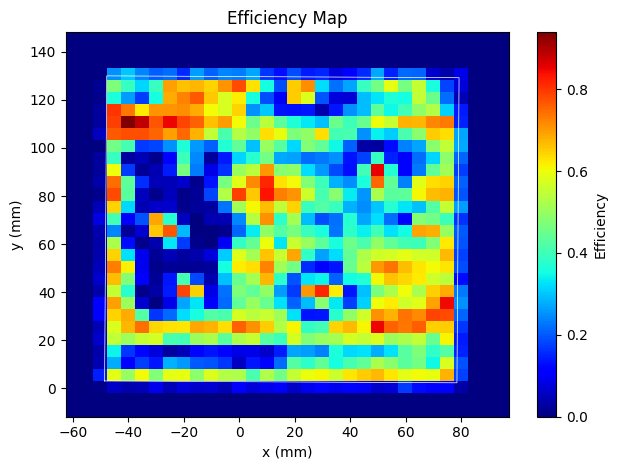

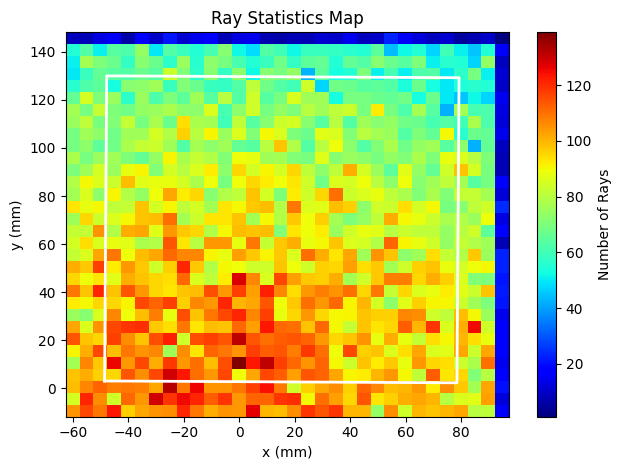

In [20]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2)

Pre-filtered rays: 411094
All rays: 411094


(array([0.        , 0.        , 0.55092025, 0.55491585, 0.38377193,
        0.32315522, 0.3655914 , 0.43694779, 0.39007401, 0.36189648,
        0.34481236, 0.48264038, 0.52202284, 0.57618651, 0.55331654,
        0.59796438, 0.60181582, 0.60269214, 0.57988922, 0.639481  ,
        0.64456722, 0.73809524, 0.71177829, 0.65684017, 0.72806172,
        0.74210278, 0.75329751, 0.74069834, 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.72260094, 0.58892989, 0.36370316,
        0.49714503, 0.7411985 , 0.74458204, 0.58875969, 0.54787445,
        0.54996066, 0.51916803, 0.50753138, 0.50767316, 0.52570922,
        0.45746102, 0.33173077, 0.47830059, 0.50163628, 0.43694327,
        0.37118977, 0.30936709, 0.54108858, 0.65547074, 0.57983651,
        0.41836174, 0.47969394, 0.59868421, 0.        , 0.        ,
        0.        ]))

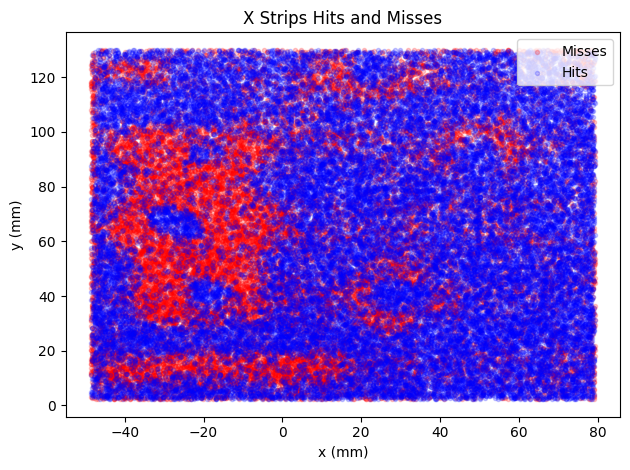

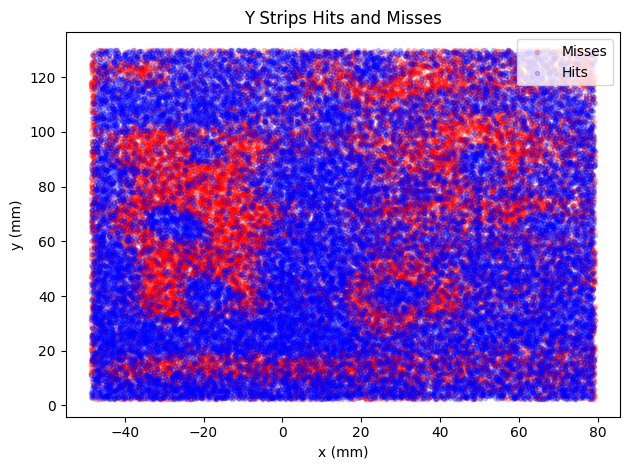

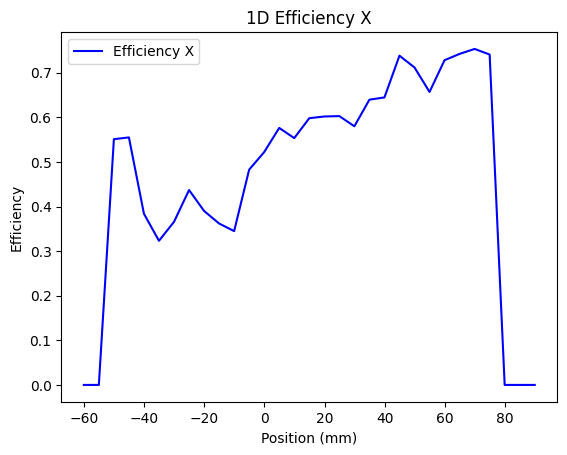

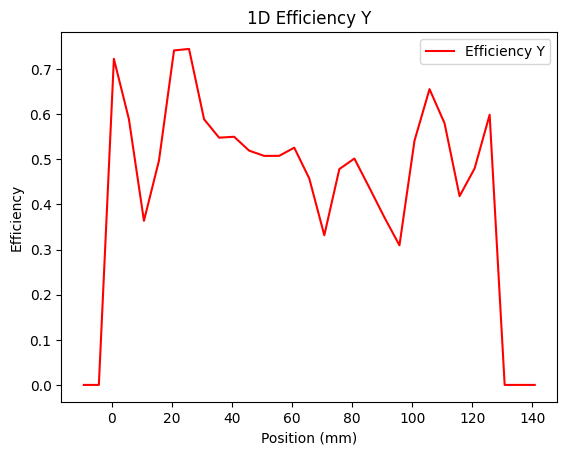

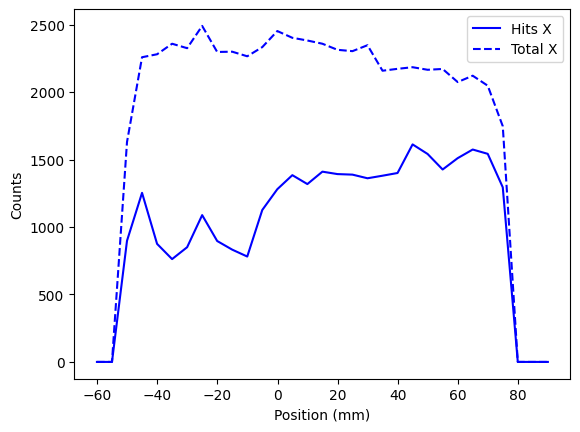

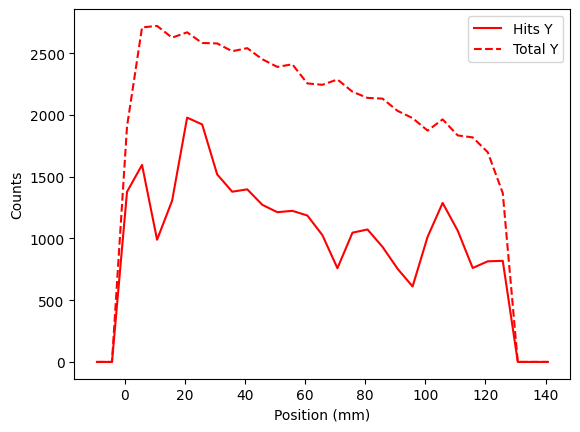

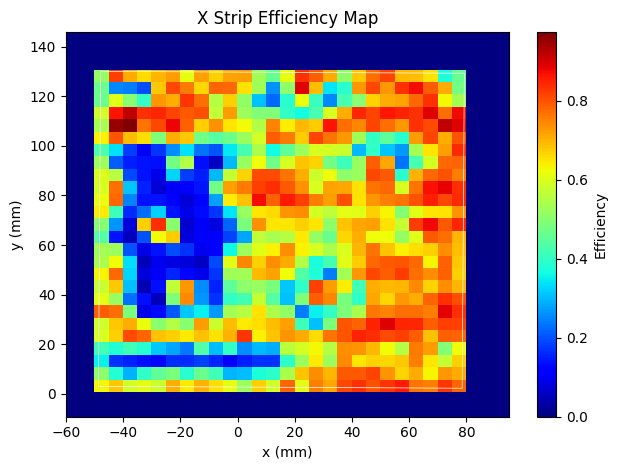

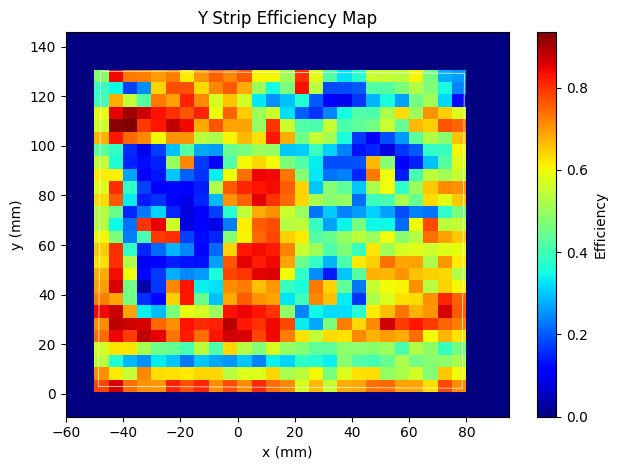

In [21]:
get_efficiency_1d(det, ray_data, plot=True, tolerance=0.2)

C:\Users\Dylan\PycharmProjects\saclay_micromegas\poc\det_classes_test.py:1143: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


X Residuals: Mean=28μm, Std=608μm
Y Residuals: Mean=-105μm, Std=558μm
X Residuals: Mean=-119μm, Std=600μm
Y Residuals: Mean=-12μm, Std=725μm
X Residuals: Mean=42μm, Std=634μm
Y Residuals: Mean=41μm, Std=626μm
X Residuals: Mean=-101μm, Std=625μm
Y Residuals: Mean=74μm, Std=746μm


(-0.029947349311838123,
 -0.011971505483205299,
 0.5435661987667649,
 0.5694195059261183)

C:\Users\Dylan\anaconda3\envs\saclay_micromegas\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Dylan\anaconda3\envs\saclay_micromegas\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


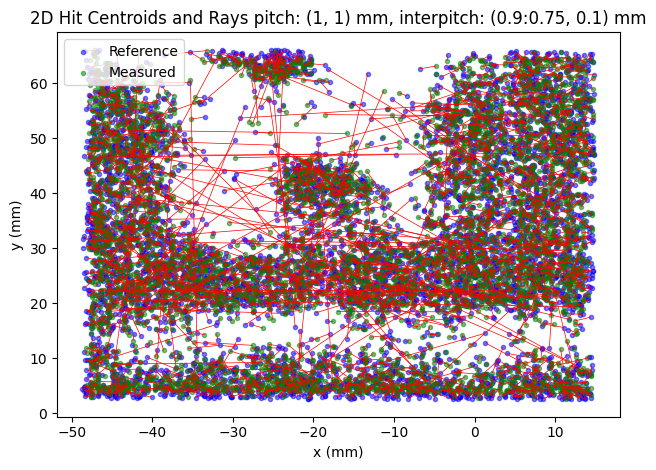

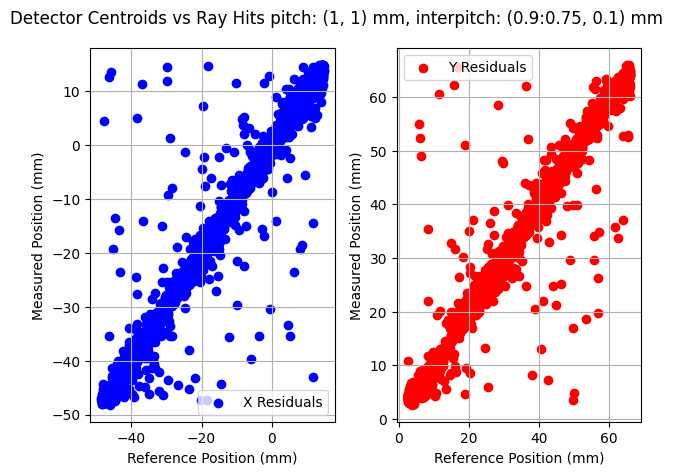

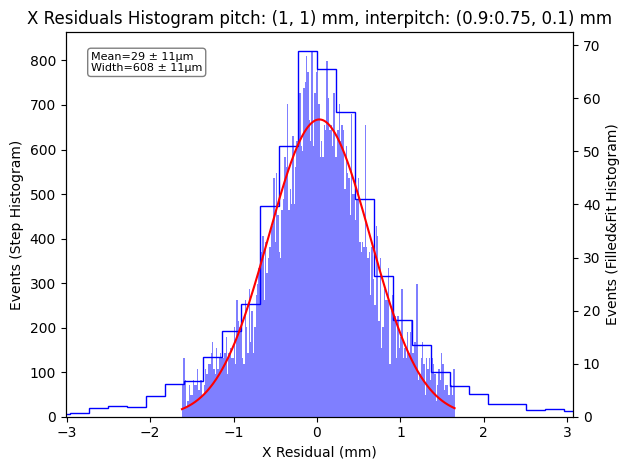

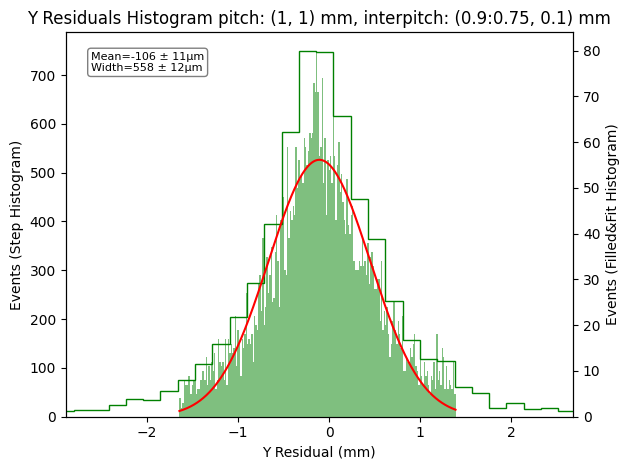

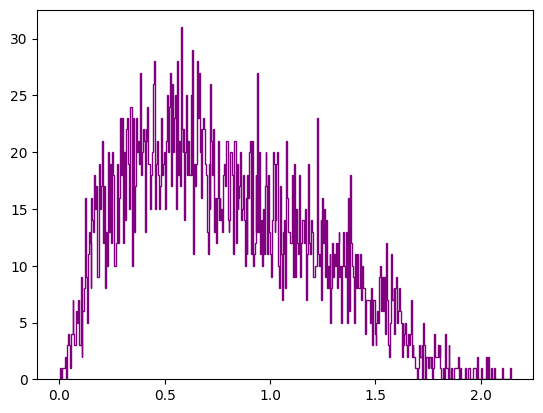

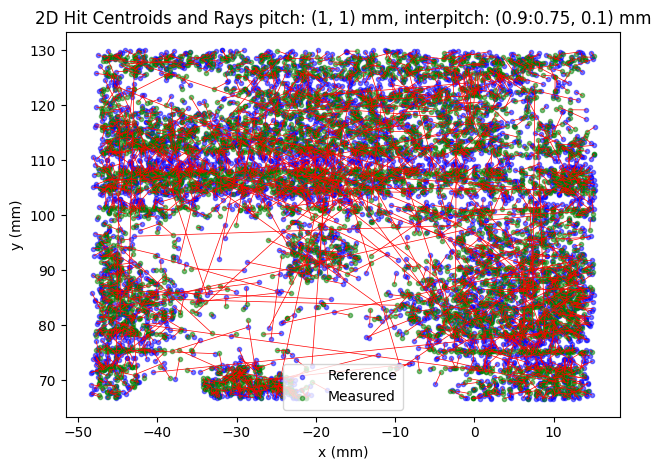

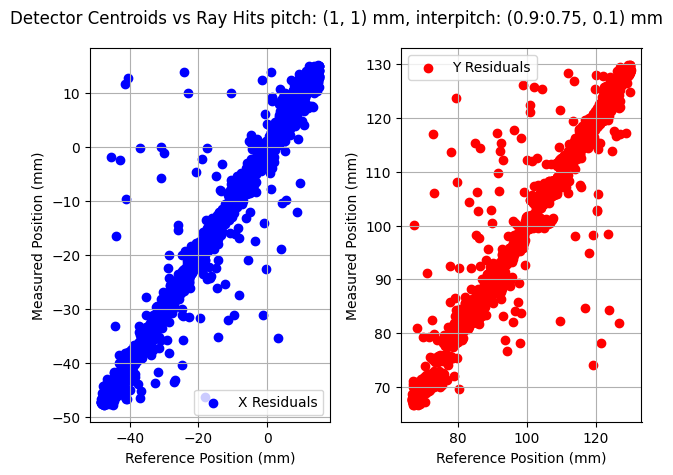

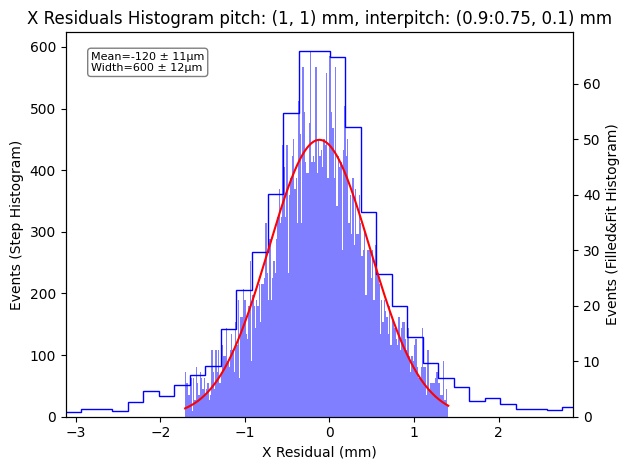

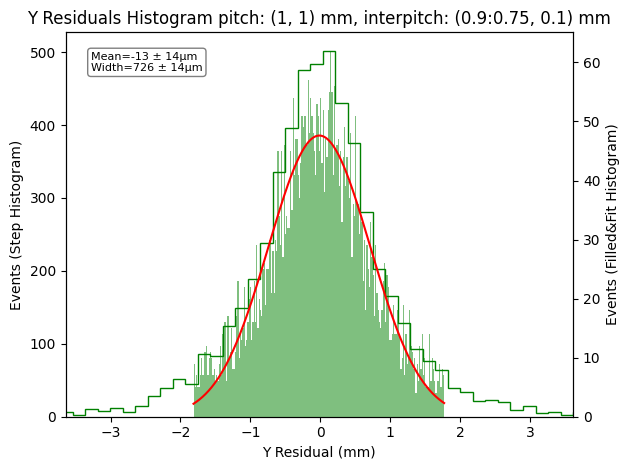

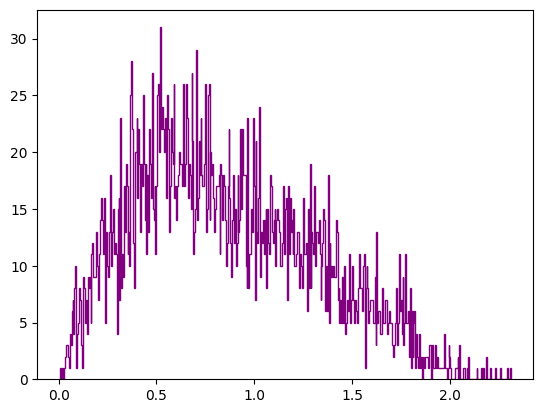

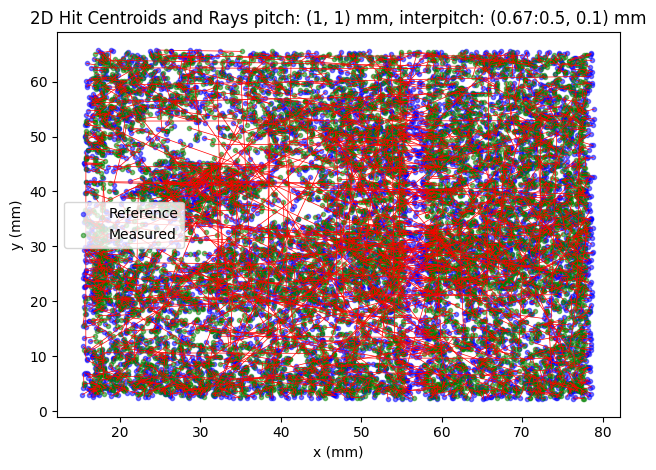

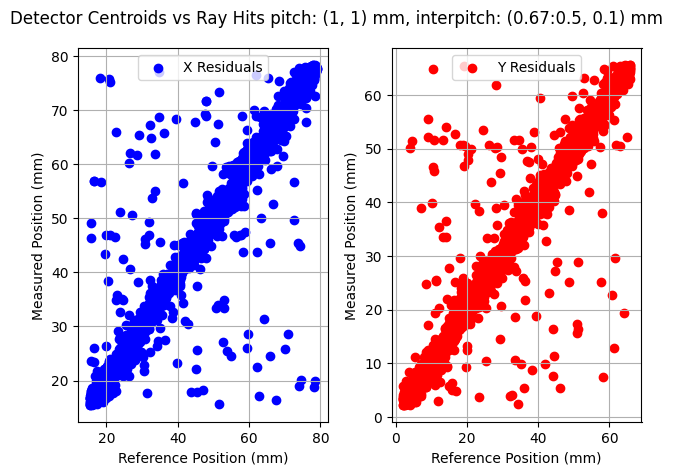

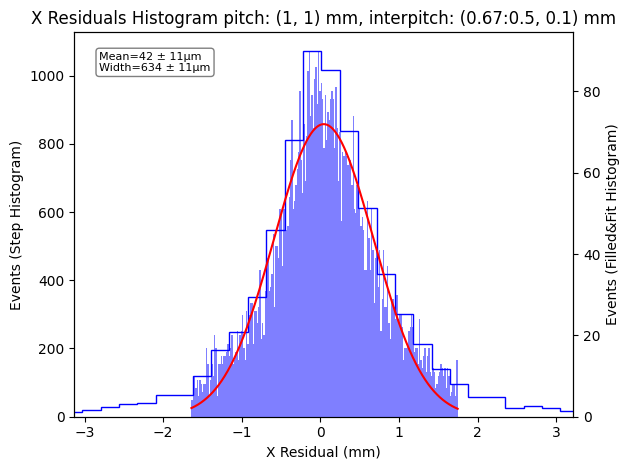

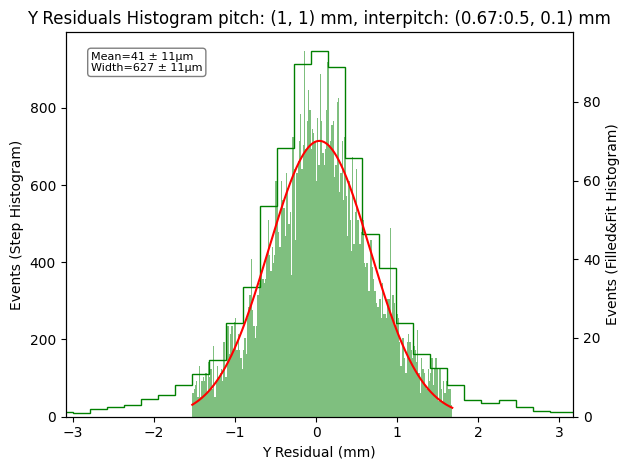

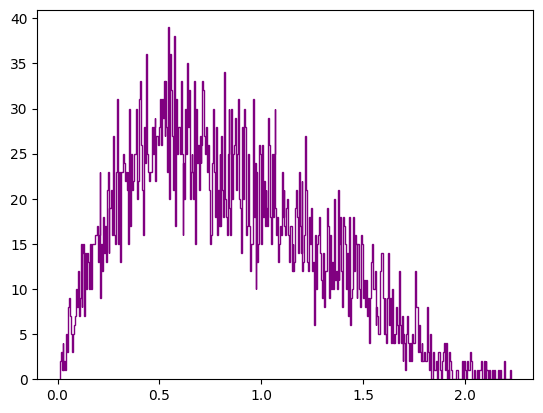

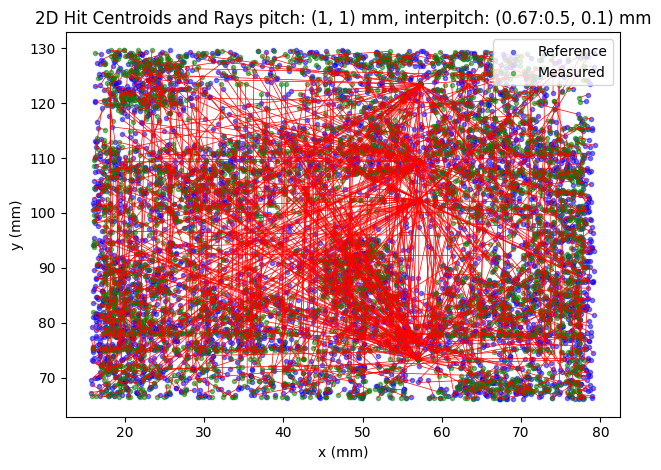

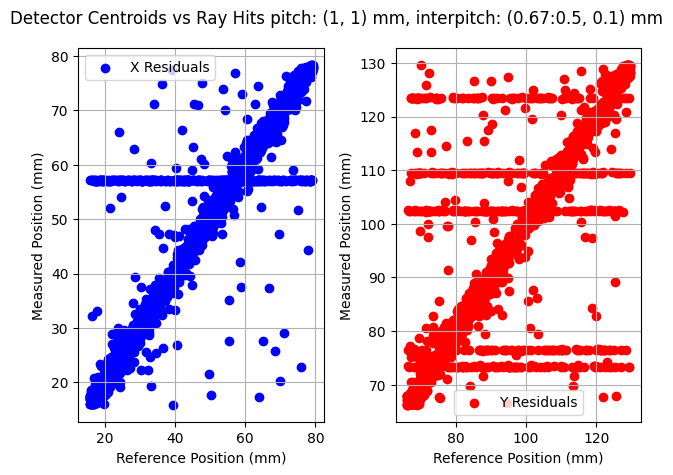

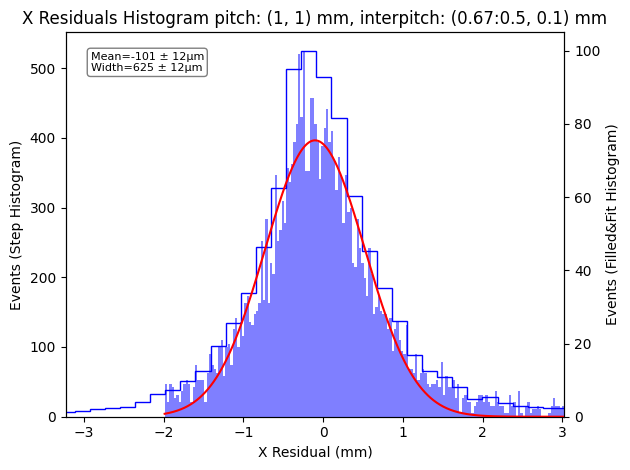

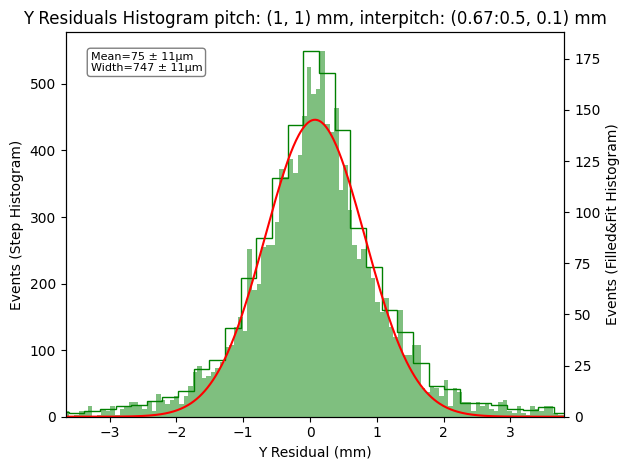

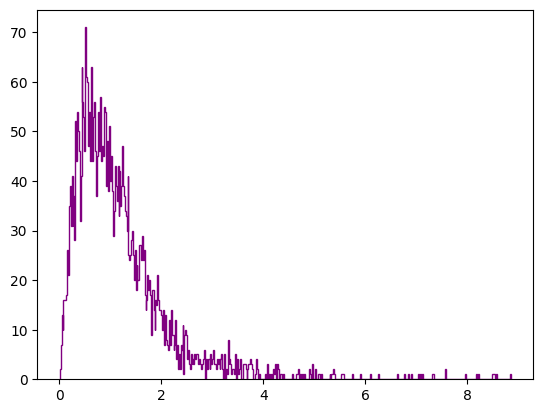

In [22]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

New stuff above

In [23]:
print(det.sub_detectors)

[<DreamSubDetector.DreamSubDetector object at 0x0000020F696A5B20>, <DreamSubDetector.DreamSubDetector object at 0x0000020F696A52E0>, <DreamSubDetector.DreamSubDetector object at 0x0000020F696A5550>, <DreamSubDetector.DreamSubDetector object at 0x0000020F696A54C0>]


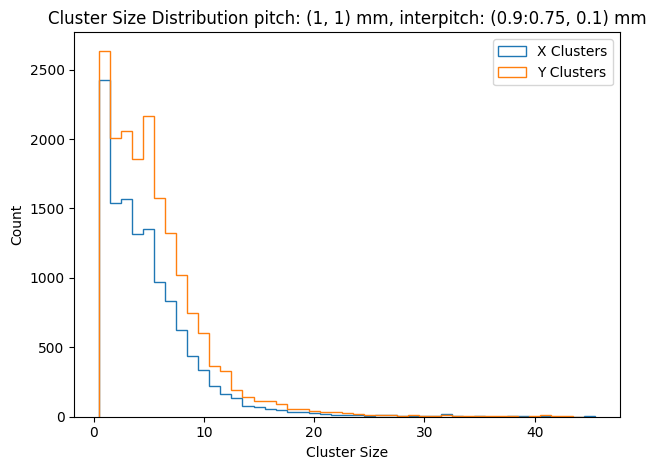

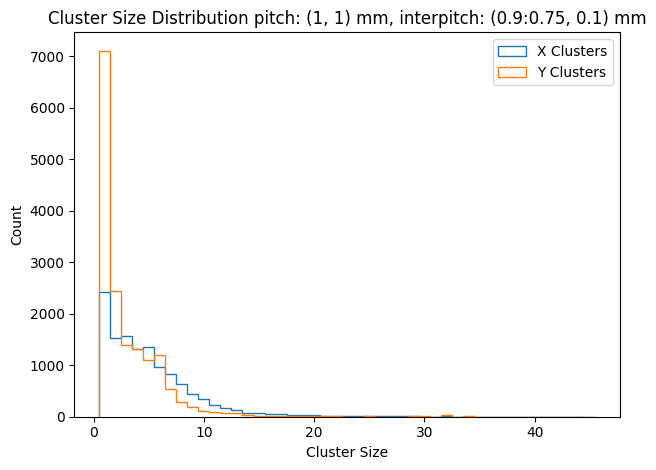

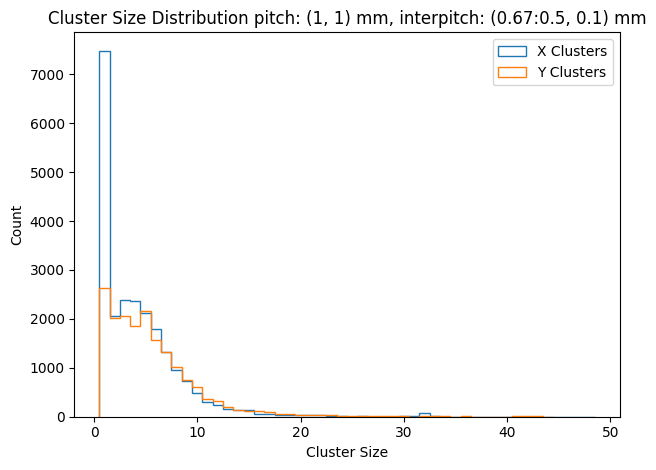

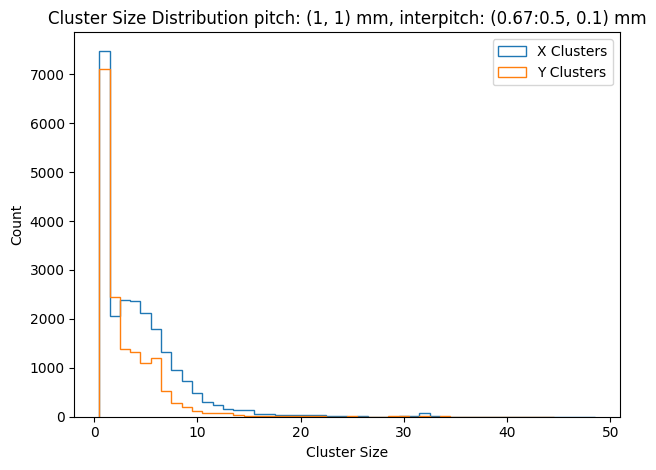

In [24]:
for sub_det in det.sub_detectors:
    sub_det.plot_cluster_sizes()